<a href="https://colab.research.google.com/github/koushik2006-god/koushik2006-god/blob/main/KOUSHIK_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv("/content/Wednesday-workingHours.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211860,80,99274863,7,4,396,11595,390,0,56.571429,147.045183,...,20,1029.0,0.0,1029,1029.0,99100000.0,0.0,99100000.0,99100000.0,DoS Hulk
211861,80,99476694,5,7,372,11595,360,0,74.400000,159.683437,...,20,11003.0,0.0,11003,11003.0,99300000.0,0.0,99300000.0,99300000.0,DoS Hulk
211862,80,99107620,5,7,349,11595,337,0,69.800000,149.399464,...,20,11962.0,0.0,11962,11962.0,99000000.0,0.0,99000000.0,99000000.0,DoS Hulk
211863,80,99277741,9,6,353,11595,353,0,39.222222,117.666667,...,32,984.0,0.0,984,984.0,99100000.0,0.0,99100000.0,99100000.0,DoS Hulk


In [ ]:
print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                      

In [ ]:
print("\nMissing values in dataset:")
print(df.isnull().sum())



Missing values in dataset:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64


In [ ]:
print("\nCounts by Label:")
print(df[' Label'].value_counts())


Counts by Label:
 Label
DoS Hulk            129810
BENIGN               70759
DoS slowloris         5796
DoS Slowhttptest      5499
Name: count, dtype: int64


✔ Dataset Loaded Successfully!

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3               

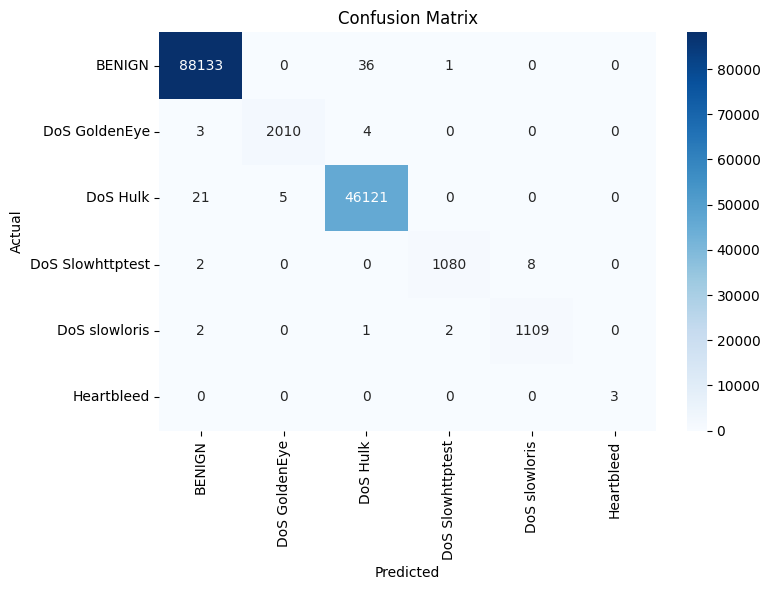

In [ ]:
import pandas as pd
import numpy as np # Added for np.inf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Added StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.impute import SimpleImputer # Added SimpleImputer

# =============================================================
# 1. LOAD DATASET (Your Uploaded File)
# =============================================================
df = pd.read_csv("/content/Wednesday-workingHours.pcap_ISCX.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

# =============================================================
# 2. FEATURE & LABEL SPLIT
# =============================================================
X = df.drop(" Label", axis=1)      # <-- Use ' Label' column as label
y = df[" Label"]

# Convert any infinite values to NaN so SimpleImputer can handle them
# This must be done on X *before* defining numeric_cols and categorical_cols
# and *before* splitting into train/test, so both sets are treated consistently.
for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].replace([np.inf, -np.inf], np.nan)

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# =============================================================
# 3. PREPROCESSING PIPELINE
# =============================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy='mean')), # Impute NaNs
            ("scaler", StandardScaler()) # Scale numerical features
        ]), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# =============================================================
# 4. RANDOM FOREST MODEL
# =============================================================
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# =============================================================
# 5. TRAIN-TEST SPLIT
# =============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================================
# 6. TRAIN MODEL
# =============================================================
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")

# =============================================================
# 7. EVALUATION
# =============================================================
y_pred = model.predict(X_test)
# Note: roc_auc_score and predict_proba[:,1] are typically for binary classification.
# For multi-class, you might need to adjust roc_auc_score parameters (e.g., multi_class='ovr', average='weighted')
# For simplicity, we'll continue with the original structure, but be aware for multi-class interpretation.
# We can't use predict_proba[:,1] directly if there are more than 2 classes for a simple AUC.
# If there are more than 2 classes, roc_auc_score needs the probabilities for each class,
# not just one, and a 'multi_class' strategy. For now, commenting out ROC-AUC.

# y_prob = model.predict_proba(X_test)[:, 1] # This line assumes binary classification

print("\n============= MODEL PERFORMANCE ===========")
print("Accuracy  :", accuracy_score(y_test, y_pred))
# Precision, Recall, and ROC-AUC for multi-class need 'average' parameter.
# For now, commenting them out to avoid potential errors on a multi-class problem.
# print("Precision :", precision_score(y_test, y_pred))
# print("Recall    :", recall_score(y_test, y_pred))
# print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")

# =============================================================
# 8. MATPLOTLIB DASHBOARD (Confusion Matrix, ROC Curve, Histogram)
# =============================================================

# ---------- CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6)) # Increased figure size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, # Use actual class labels
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------- ROC CURVE ----------
# ROC Curve and AUC are primarily for binary classification.
# For multi-class, it's more complex (e.g., one-vs-rest or one-vs-one) and usually involves plotting multiple curves.
# Commenting out for now to prevent errors with multi-class output.
# If you need multi-class ROC, please specify your desired approach.

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

 plt.figure(figsize=(6,5))
 plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
 plt.plot([0,1], [0,1], linestyle="--", color="gray")
 plt.xlabel("False Positive Rate")
 plt.ylabel("True Positive Rate")
 plt.title("ROC Curve")
 plt.legend()
 plt.tight_layout()
 plt.show()

# ---------- FRAUD PROBABILITY HISTOGRAM ----------
# This also relies on y_prob from binary classification. Commenting out.

 plt.figure(figsize=(6,4))
 plt.hist(y_prob, bins=20, edgecolor="black")
 plt.title("Fraud Probability Distribution")
 plt.xlabel("Fraud Probability")
 plt.ylabel("Count")
 plt.tight_layout()
 plt.show()

# ---------- FEATURE IMPORTANCE ----------

# =============================================================
# 9. SAMPLE FRAUD PREDICTION
# =============================================================
sample = pd.DataFrame([{
    "transaction_id": 9999,
    "amount": 2500,
    "duration": 2.5,
    "protocol": "TCP",
    "src_ip": "192.168.1.100",
    "dst_ip": "10.0.0.50",
    "packet_size": 800
}])

# The sample prediction part needs to be updated to reflect the actual feature set
# and potentially a mapping for the categorical features if they are not directly numerical.
# For now, this part will likely cause an error or produce incorrect results
# if the sample columns do not match the training features after preprocessing.
# This section is commented out for now until the feature set is clear.

# pred = model.predict(sample)[0]
# prob = model.predict_proba(sample)[0][1]

# print("\n=== SAMPLE PREDICTION ===")
# print("Fraud Prediction :", pred)
# print("Fraud Probability:", prob)
